# 1. Data Loading

In [120]:
STATE=34

In [121]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = os.path.join(os.getcwd(), 'dataset')
OUTPUT_DIR = os.path.join(os.getcwd(), 'output')
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [122]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
target = pd.read_csv(os.path.join(DATA_DIR, 'target.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

In [123]:
train["target"] = target["coppaRisk"]
train["target"] = train["target"].astype(int)

# 2. Data Description

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [125]:
train.describe(include='all')

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
count,7000,6936,7.000000e+03,7000,4851,7000,6250,2365,2365,5872.000000,1.321000e+03,6950.000000,5768.000000,838,7000,7000,7000.000000
unique,114,119,NaN,46,26,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3,NaN
top,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low,NaN
freq,4338,5802,NaN,1828,699,6045,6189,1424,1424,NaN,NaN,NaN,NaN,536,5652,6983,NaN
mean,NaN,NaN,3.256274e+04,NaN,NaN,NaN,NaN,NaN,NaN,45.740293,3.977563e+03,57.093060,2.482490,NaN,NaN,NaN,0.099429
std,NaN,NaN,5.501431e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.361215,9.219919e+04,37.169895,1.905712,NaN,NaN,NaN,0.299258
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.038525e-03,0.533333,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.086920e+00,27.533333,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.945580e+00,52.866667,3.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,8.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,4.908375e+01,80.000000,4.000000,NaN,NaN,NaN,0.000000


In [126]:
test.describe(include='all')

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
count,3000.000000,3000,2971,3.000000e+03,3000,2119,3000,2684,1039,1039,2560.000000,574.000000,2983.000000,2486.000000,329,3000,3000
unique,NaN,89,92,NaN,45,21,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3
top,NaN,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low
freq,NaN,1821,2470,NaN,805,334,2603,2652,643,643,NaN,NaN,NaN,NaN,213,2451,2996
mean,5016.298333,NaN,NaN,3.576905e+04,NaN,NaN,NaN,NaN,NaN,NaN,46.444922,286.612276,56.044396,2.490748,NaN,NaN,NaN
std,2894.991128,NaN,NaN,4.455556e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.415285,1890.997697,36.417410,1.896230,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.007450,-1.200000,0.000000,NaN,NaN,NaN
25%,2495.750000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.121507,26.933333,0.000000,NaN,NaN,NaN
50%,4969.500000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.186537,51.933333,3.000000,NaN,NaN,NaN
75%,7585.500000,NaN,NaN,8.250000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,44.878463,77.750000,4.000000,NaN,NaN,NaN


In [127]:
train.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,0
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,0
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,0
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,0
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,0


In [128]:
test.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


In [129]:
train.isnull().sum()

developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2149
deviceType                            0
hasPrivacyLink                      750
hasTermsOfServiceLink              4635
hasTermsOfServiceLinkRating        4635
isCorporateEmailScore              1128
adSpent                            5679
appAge                               50
averageUserRating                  1232
appContentBrandSafetyRating        6162
appDescriptionBrandSafetyRating       0
mfaRating                             0
target                                0
dtype: int64

In [130]:
test.isnull().sum()

ID                                    0
developerCountry                      0
countryCode                          29
userRatingCount                       0
primaryGenreName                      0
downloads                           881
deviceType                            0
hasPrivacyLink                      316
hasTermsOfServiceLink              1961
hasTermsOfServiceLinkRating        1961
isCorporateEmailScore               440
adSpent                            2426
appAge                               17
averageUserRating                   514
appContentBrandSafetyRating        2671
appDescriptionBrandSafetyRating       0
mfaRating                             0
dtype: int64

# 3. Exploratory Data Analysis

## Categorical and Numerical Cols

In [131]:
cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

In [132]:
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: Index(['developerCountry', 'countryCode', 'primaryGenreName', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating'],
      dtype='object')
Numerical columns: Index(['userRatingCount', 'isCorporateEmailScore', 'adSpent', 'appAge',
       'averageUserRating', 'target'],
      dtype='object')


## Target Distribution

<Axes: xlabel='target'>

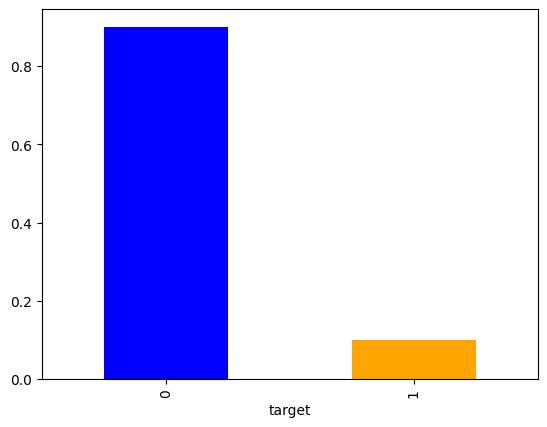

In [133]:
train['target'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

In [134]:
train['target'].value_counts()

target
0    6304
1     696
Name: count, dtype: int64

## Numerical Correlations

Text(0.5, 1.0, 'Correlation Heatmap')

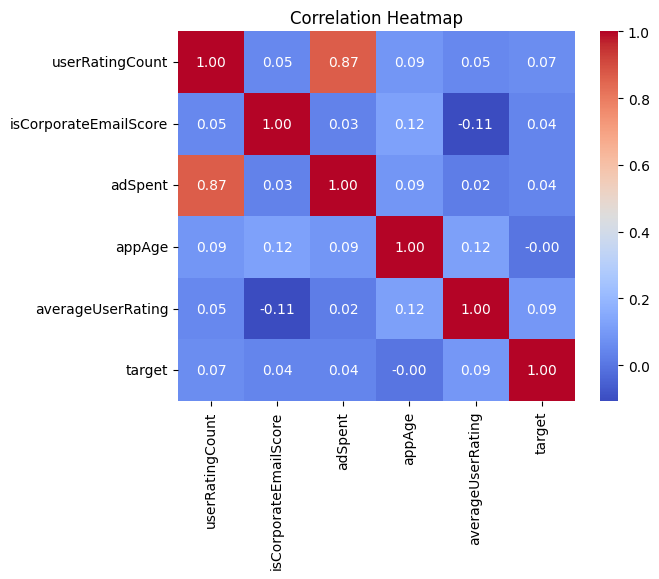

In [135]:
sns.heatmap(train[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

adSpent is very correlated to userRatingCount so maybe we will drop it

# 4. Preprocessing

In [169]:
preproc = train.copy()

In [170]:
for col in num_cols:
        preproc[col] = preproc[col].fillna(preproc[col].median())

## One Hot Encoding

In [171]:
from sklearn.preprocessing import OneHotEncoder

In [172]:
print(cat_cols)

Index(['developerCountry', 'countryCode', 'primaryGenreName', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating'],
      dtype='object')


In [173]:
preproc[cat_cols] = preproc[cat_cols].astype('str')

In [174]:
one_coder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
one_hot_encoded = one_coder.fit_transform(preproc[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded,columns=one_coder.get_feature_names_out(cat_cols))
preproc.drop(cat_cols,axis=1,inplace=True)
preproc = pd.concat([preproc,one_hot_df],axis=1)

In [175]:
preproc.head()

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating,target,developerCountry_ADDRESS NOT LISTED IN PLAYSTORE,developerCountry_ALBANIA,developerCountry_ALGERIA,developerCountry_ANDORRA,...,appContentBrandSafetyRating_high,appContentBrandSafetyRating_low,appContentBrandSafetyRating_medium,appContentBrandSafetyRating_nan,appDescriptionBrandSafetyRating_high,appDescriptionBrandSafetyRating_low,appDescriptionBrandSafetyRating_medium,mfaRating_high,mfaRating_low,mfaRating_medium
0,127731,99.0,14.017220,160.400000,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,99.0,7.945580,17.500000,0.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,51143,0.0,31.883163,30.766667,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1074,99.0,7.945580,71.533333,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,17,99.0,7.945580,52.400000,4.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# 5. Modelling

## Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [155]:
X = preproc.drop(columns=['target'])
y = preproc['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=STATE)

## XGBoost

In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [156]:
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state':STATE
}

In [146]:
xgb = XGBClassifier()

In [157]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1266
           1       0.44      0.23      0.30       134

    accuracy                           0.90      1400
   macro avg       0.68      0.60      0.62      1400
weighted avg       0.88      0.90      0.88      1400

Accuracy: 0.8985714285714286
ROC AUC: 0.8565230718445686


## Feature Importance

In [158]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Fitur Terpenting:")
print(feature_importance.head(10))


Top 10 Fitur Terpenting:
                                 Feature  Importance
254               primaryGenreName_Games    0.146449
249           primaryGenreName_Education    0.130407
250       primaryGenreName_Entertainment    0.064145
331  appDescriptionBrandSafetyRating_low    0.031441
308         downloads_5000000 - 10000000    0.018601
40               developerCountry_FRANCE    0.013586
1                  isCorporateEmailScore    0.012863
278            primaryGenreName_Stickers    0.012206
322            hasTermsOfServiceLink_nan    0.012094
319                   hasPrivacyLink_nan    0.012040


# 6. Prediction

In [180]:
fin_test = test.copy()
fin_test.drop(columns=['ID'], inplace=True)

In [181]:
for col in num_cols:
    if col != 'target':
        fin_test[col] = fin_test[col].fillna(fin_test[col].median())
fin_test[cat_cols] = fin_test[cat_cols].astype('str')
fin_enc = one_coder.transform(fin_test[cat_cols])
fin_oh = pd.DataFrame(fin_enc,columns=one_coder.get_feature_names_out(cat_cols))
fin_test.drop(cat_cols,axis=1,inplace=True)
fin_test = pd.concat([fin_test,fin_oh],axis=1)

In [183]:
preds = xgb.predict_proba(fin_test)[:, 1]
submission = pd.DataFrame({
    'ID': test['ID'],
    'coppaRisk': preds
})

# 7. Submission

In [184]:
submission.to_csv(os.path.join(OUTPUT_DIR, 'submission.csv'), index=False)
print("Submission file created successfully.")

Submission file created successfully.
